# Gradient Boosting Ensemble Approach.............

----------------------------------Started Data Preparation------------------------------------


----------------------------------Prepared Dataset------------------------------------
       age  height  weight  chest_pain   bp  fbs  chol
0       80     147      45           1  135  148   311
1       61     177      47           1  149  124   268
2       53     140     103           0  185  198   226
3       44     164      84           1  156   66   241
4       54     189      85           1   79  153   249
...    ...     ...     ...         ...  ...  ...   ...
19995   25     146      49           0  169  105   303
19996   70     154      78           1  235  166   298
19997   56     144     106           0  103   95   319
19998   41     153      87           0   96  100   196
19999   50     172      55           1  236   91   307

[20000 rows x 7 columns]


----------------------------------Final Dataset------------------------------------
      age  height  weight  chest_pain   bp  

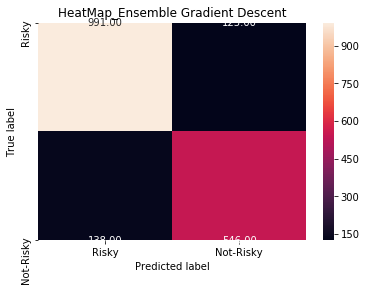



----------------------------------------Model Classification Report----------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       684
           1       0.88      0.89      0.88      1116

    accuracy                           0.85      1800
   macro avg       0.85      0.84      0.84      1800
weighted avg       0.85      0.85      0.85      1800



----------------------------------------Model Characteristics----------------------------------------
Accuracy: 0.8538888888888889
Precision: 0.8777679362267493
Recall: 0.8879928315412187
F1-Score: 0.8828507795100222
Kappa-Stat: 0.688772129129982


----------------------------------------ROC Curve----------------------------------------


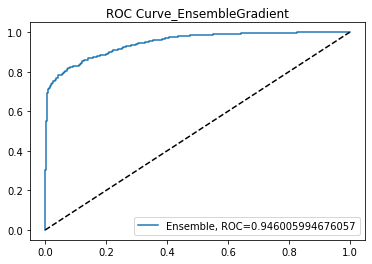



----------------------------------------Lift Curve----------------------------------------


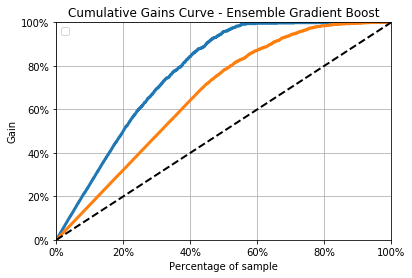



----------------------------------------Comparison Plot---------------------------------------


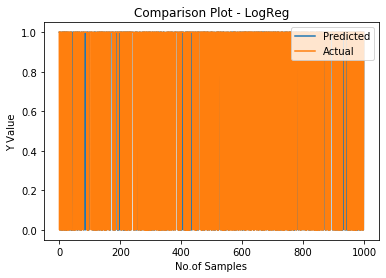

In [6]:
#importing required libraries
import os
import random
from sklearn import preprocessing
from sklearn.preprocessing import normalize
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import scikitplot as skplt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import GradientBoostingClassifier

#------------------------------------Data Preparation--------------------------------
print("----------------------------------Started Data Preparation------------------------------------")
#Define required lists
age = []
fbs = []
bp = []
chol = []
chest_pain = [] 
height = []
weight =[]

#Generates 20000 random values for them
for i in range(20000):
    chpain_t = np.random.randint(0,2)
    chol_t = np.random.randint(150,351)
    fbs_t = np.random.randint(50,201)
    height_t = np.random.randint(140,191)
    weight_t = np.random.randint(35,111)
    bp_t = np.random.randint(75,261)
    if i%5==0 or i%3==0:
        age_t = np.random.choice([np.random.randint(20,46),np.random.randint(71,86)])
    else:
        age_t = np.random.randint(45,71)
    age.append(age_t)
    height.append(height_t)
    weight.append(weight_t)
    chest_pain.append(chpain_t)
    bp.append(bp_t)
    fbs.append(fbs_t)
    chol.append(chol_t)

#makes heart dictionary
heart_dict = {'age':age, 'height':height, 'weight':weight, 'chest_pain':chest_pain, 'bp':bp, 'fbs':fbs, 'chol':chol}
df_heart = pd.DataFrame(heart_dict)

#Displaying prepared Dataset
print("\n\n----------------------------------Prepared Dataset------------------------------------")
print(df_heart)
df_heart.to_csv('heart_data.csv',index=False)





#------------------------------------Data Filtering--------------------------------
print("\n\n----------------------------------Started Data Filtering------------------------------------")
df = pd.read_csv('heart_data.csv')
df1 = pd.read_csv('heart_data.csv')

#Initialising Lists
risk = []
rule = []

#Filtering RuleSets
for i in range(len(df)):
    bmi = round(((df.iloc[i,2])/((df.iloc[i,1]/100)**2)),2)
    temp = df.iloc[i,:].tolist()
    if((temp[5]>120 and temp[4]>145 and temp[0]>52) or (bmi>=24.5 and temp[6]>210) or (temp[3]==1 and temp[6]>200 and temp[0]>56)):
        risk.append(1)
#         rule.append(1)
    elif((temp[4]>150 and temp[6]>210) or (temp[3]==1 and temp[4]<150 and temp[6]>200) or (temp[5]>=120 and temp[0]>60 and temp[6]<200)):
        risk.append(1)
#         rule.append(2)
    elif((temp[3]==0 and (bmi in range(18,25)) and temp[6]<190 and temp[0]<30) or (temp[5]<120 and temp[6]<190 and temp[0]<40)):
        risk.append(0)
#         rule.append(3)
    else:
        risk.append(0)
#         rule.append(0)

#Updating Dataset
df1.insert(7,'risk',risk)

#Data Balancing
df_yes = df1[df1.risk == 1]
df_no = df1[df1.risk == 0]
df_new = df1.iloc[-1:-1,:]
#new dataset
df_new = df_new.append(df_no,ignore_index=True)
df_new = df_new.iloc[:3824,:]
df_new = df_new.append(df_yes,ignore_index=True)
df_new = df_new.iloc[:10000,:]
#Shuffling Dataset
df_new = shuffle(df_new).reset_index(drop=True)

#displaying final dataset and saving a copy
print("\n\n----------------------------------Final Dataset------------------------------------")
print(df_new)
df_new.to_csv('heart_pred_dataset.csv',index=False)





#------------------------------------Data Modelling--------------------------------
print("\n\n------------------------------------Started Data Modelling--------------------------------")
#Model = Ensemble Gradient Descent

#Loading DataSet
df = pd.read_csv('heart_pred_dataset.csv')
print("\n\n----------------------------------Data------------------------------------")
print(df)


#splittng data for prediction
df1 = df.iloc[9000:,:]
df = df.iloc[:9000,:]


#data for prediction
test_XX = df1.iloc[:,:-1].values
#Actual Result data
actual_yy = df1.iloc[:,-1].values
actual_y = actual_yy.tolist()


#Value Counts
print("\n\n----------------------------------Value Counts------------------------------------")
print(df.risk.value_counts())


#Description
print("\n\n----------------------------------------Data Description----------------------------------------")
print(df.describe())


#Independent and dependent variables
X = df.iloc[:,:7]
Y = df.iloc[:,-1]

#Features
print("\n\n----------------------------------------Features----------------------------------------")
X_features = list(df.columns)
print("Features: ",X_features[:-1])
print("Dependent Variable: ",X_features[-1])


#splitting data for testing and training
train_X, test_X, train_y, test_y = train_test_split(X,Y,test_size = 0.2,random_state = 65)


#Initialising Model
print("\n----------------------------------------Model Initialized----------------------------------------")
ensgr = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
#Training Model
print("\n----------------------------------------Model Trained----------------------------------------")
ensgr.fit( train_X, train_y)
#Finding Predict Proba
print("\n----------------------------------------Calculated Predict Prroba----------------------------------------")
pred_y6 = ensgr.predict(test_X)


#Finding Errors
print("\n\n----------------------------------------Errors----------------------------------------")
r26=r2_score(test_y, pred_y6) 
mse6=mean_squared_error(test_y, pred_y6)
print("R Squared Error : ",r26)
print("Mean Squared Error : ",mse6)


#Displaying Heatmap
print("\n\n----------------------------------------Model Heatmap----------------------------------------")
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Risky", "Not-Risky"] ,
    yticklabels = ["Risky", "Not-Risky"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('HeatMap_Ensemble Gradient Descent')
    plt.show()
draw_cm(test_y,pred_y6 )


#displaying classification report
print("\n\n----------------------------------------Model Classification Report----------------------------------------")
print( metrics.classification_report( test_y, pred_y6 ) )


#Displaying Model Characteristics
print("\n\n----------------------------------------Model Characteristics----------------------------------------")
acc6 = metrics.accuracy_score(test_y, pred_y6)
print("Accuracy:",acc6)

prec6 = metrics.precision_score(test_y, pred_y6)
print("Precision:",prec6)

recall6 = metrics.recall_score(test_y, pred_y6)
print("Recall:",recall6)

f1sc6 = metrics.f1_score(test_y, pred_y6)
print("F1-Score:",f1sc6)

kappa6 = metrics.cohen_kappa_score(test_y, pred_y6)
print("Kappa-Stat:",kappa6)

#displaying ROC Curve
print("\n\n----------------------------------------ROC Curve----------------------------------------")
y_pred_proba6 = ensgr.predict_proba(test_X)[:,1]
fpr6, tpr6, _ = metrics.roc_curve( test_y,  y_pred_proba6)
auc6 = metrics.roc_auc_score( test_y, y_pred_proba6)
plt.plot(fpr6,tpr6,label="Ensemble, ROC="+str(auc6))
plt.legend(loc=4)
plt.title('ROC Curve_EnsembleGradient')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

#displaying Lift Curve
print("\n\n----------------------------------------Lift Curve----------------------------------------")
predicted_probas6 = ensgr.predict_proba(test_X)
skplt.metrics.plot_cumulative_gain(test_y, predicted_probas6)
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0],["0%","20%","40%","60%","80%","100%"])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0],["0%","20%","40%","60%","80%","100%"])
plt.legend('')
plt.title("Cumulative Gains Curve - Ensemble Gradient Boost")
plt.show()

#displaying Comparison Plot
print("\n\n----------------------------------------Comparison Plot---------------------------------------")
pred = ensgr.predict(test_XX)
def comaprison_plot(pred,actual):
    plt.plot(np.arange(1000),pred,label='Predicted')
    plt.plot(np.arange(1000),actual,label='Actual')
    plt.xlabel('No.of Samples')
    plt.ylabel('Y Value')
    plt.legend(loc='upper right')
    plt.title('Comparison Plot - LogReg')
    plt.show()

comaprison_plot(pred,actual_yy)

#displaying Box Plot
print("\n\n----------------------------------------Box Plot---------------------------------------")
df1.plot(kind='box')
plt.show()